In [2]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import os

    
train = []
train_image = []
train_labels = []
index = 0
lis = os.listdir('./img/train/')
for i in lis:
    i_lis = os.listdir(f'./img/train/{i}')
    print(i,'processing...')
    for j in i_lis:
        img = Image.open(f'./img/train/{i}/{j}')
        img = img.convert('RGB')
        img = img.resize((128,128))
        img = np.array(img)
        train.append((img,index))
        # train_image.append(img)
        # train_labels.append(index)
    index += 1

Basil processing...
Euphorbia milii processing...
ivy processing...
Monstera processing...
Sansevieria processing...
Scindapsus processing...
Stuckyi processing...


In [4]:
import random

random.shuffle(train)
train

[(array([[[236, 235, 240],
          [237, 237, 240],
          [237, 238, 240],
          ...,
          [237, 237, 237],
          [237, 237, 237],
          [237, 237, 237]],
  
         [[236, 235, 240],
          [237, 237, 240],
          [237, 238, 240],
          ...,
          [237, 237, 237],
          [237, 237, 237],
          [237, 237, 237]],
  
         [[236, 235, 240],
          [237, 237, 241],
          [237, 238, 239],
          ...,
          [237, 237, 237],
          [237, 237, 237],
          [237, 237, 237]],
  
         ...,
  
         [[184, 106,  67],
          [186, 108,  69],
          [189, 110,  71],
          ...,
          [237, 237, 237],
          [237, 237, 237],
          [237, 237, 237]],
  
         [[185, 107,  68],
          [187, 108,  69],
          [189, 110,  71],
          ...,
          [237, 237, 237],
          [237, 237, 237],
          [237, 237, 237]],
  
         [[187, 105,  68],
          [189, 107,  70],
          [192, 110,  73

In [5]:
for i in range(len(train)):
    train_image.append(train[i][0])
    train_labels.append(train[i][1])

In [6]:
train_image=np.array(train_image)
train_labels=np.array(train_labels)
print(train_image.shape,train_labels.shape)

(10334, 128, 128, 3) (10334,)


In [8]:
import os
test = []
test_image = []
test_labels = []
index = 0
lis = os.listdir('./img/test/')
for i in lis:
    i_lis = os.listdir(f'./img/test/{i}')
    for j in i_lis:
        img = Image.open(f'./img/test/{i}/{j}')
        img = img.convert('RGB')
        img = img.resize((128,128))
        img = np.array(img)
        test.append((img,index))
        # test_image.append(img)
        # test_labels.append(index)
        
    index += 1

In [9]:
import random

random.shuffle(test)
test

[(array([[[ 99,  96,  88],
          [ 75,  72,  64],
          [ 85,  82,  74],
          ...,
          [ 35,  37,  36],
          [ 35,  37,  36],
          [ 37,  39,  38]],
  
         [[ 79,  76,  70],
          [ 63,  60,  54],
          [ 42,  39,  33],
          ...,
          [ 33,  35,  34],
          [ 36,  38,  37],
          [ 39,  41,  40]],
  
         [[ 53,  49,  45],
          [ 52,  49,  45],
          [ 33,  29,  25],
          ...,
          [ 30,  32,  31],
          [ 37,  39,  38],
          [ 40,  42,  41]],
  
         ...,
  
         [[161, 196,  95],
          [164, 199,  95],
          [166, 202,  95],
          ...,
          [ 14,  16,  13],
          [ 10,  12,   9],
          [ 20,  22,  19]],
  
         [[ 97, 121,  53],
          [108, 132,  62],
          [125, 150,  77],
          ...,
          [ 12,  14,  11],
          [ 20,  22,  19],
          [ 19,  21,  18]],
  
         [[ 48,  61,  43],
          [ 55,  68,  48],
          [ 81,  95,  72

In [10]:
for i in range(len(test)):
    test_image.append(test[i][0])
    test_labels.append(test[i][1])

In [11]:
test_image=np.array(test_image)
test_labels=np.array(test_labels)
print(test_image.shape,test_labels.shape)

(1006, 128, 128, 3) (1006,)


In [12]:
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images,labels

train_images, train_labels = get_preprocessed_data(train_image,train_labels)
test_images, test_labels = get_preprocessed_data(test_image,test_labels)

In [13]:
print('train dataset shape', train_images.shape, train_labels.shape)
print('test dataset shape',test_images.shape,test_labels.shape)

train dataset shape (10334, 128, 128, 3) (10334,)
test dataset shape (1006, 128, 128, 3) (1006,)


In [14]:
INPUT_SIZE = 128

In [15]:
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models

model = Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=train_images.shape[1:],activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))

In [13]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import  Accuracy
import tensorflow as tf

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)


print(train_oh_labels.shape,test_oh_labels.shape)

(10334, 7) (1006, 7)


In [15]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=30,validation_split=0.20)

Epoch 1/30
259/259 [==============================] - 75s 286ms/step - loss: 1.6768 - accuracy: 0.3839 - val_loss: 1.4223 - val_accuracy: 0.4707
Epoch 2/30
259/259 [==============================] - 74s 285ms/step - loss: 1.2197 - accuracy: 0.5326 - val_loss: 1.2259 - val_accuracy: 0.5699
Epoch 3/30
259/259 [==============================] - 83s 318ms/step - loss: 1.0498 - accuracy: 0.6018 - val_loss: 1.0834 - val_accuracy: 0.5960
Epoch 4/30
259/259 [==============================] - 104s 402ms/step - loss: 0.8786 - accuracy: 0.6717 - val_loss: 1.0362 - val_accuracy: 0.6347
Epoch 5/30
259/259 [==============================] - 114s 441ms/step - loss: 0.7216 - accuracy: 0.7373 - val_loss: 1.0180 - val_accuracy: 0.6265
Epoch 6/30
259/259 [==============================] - 115s 443ms/step - loss: 0.5543 - accuracy: 0.7978 - val_loss: 1.0955 - val_accuracy: 0.6260
Epoch 7/30
259/259 [==============================] - 119s 460ms/step - loss: 0.4476 - accuracy: 0.8367 - val_loss: 1.0966 - va

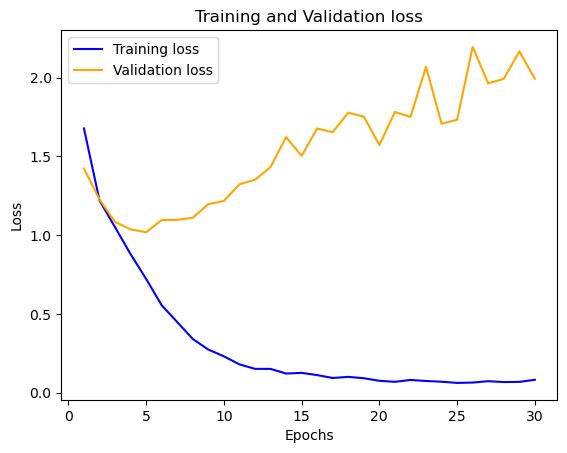

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs, val_loss, 'orange',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

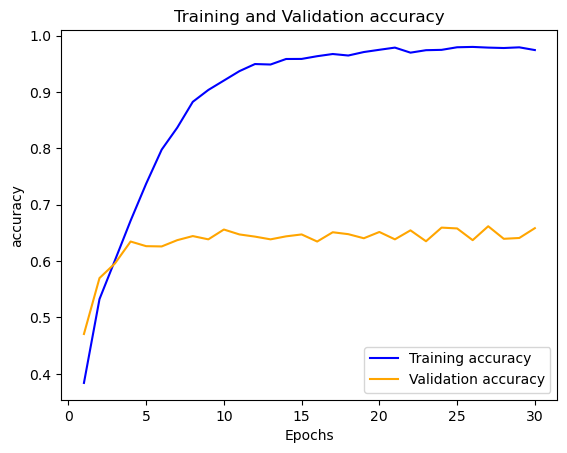

In [17]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs, val_acc, 'orange',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [18]:
model.evaluate(test_images,test_oh_labels)

32/32 [==============================] - 5s 165ms/step - loss: 3.2970 - accuracy: 0.5477


[3.296987771987915, 0.5477136969566345]

In [19]:
r = []
lis = os.listdir('./img/Random_image/')
for i in lis:
    print(i)
    img = Image.open(f'./img/Random_image/{i}')
    img = img.convert('RGB')
    img = img.resize((128,128))
    img = np.array(img)
    r.append(img)
r=np.array(r)
pred = model.predict(r)
for p in pred:
    if np.argmax(p) == 0:
        print('바질')
    elif np.argmax(p) == 1:
        print('몬스테라')
    elif np.argmax(p) == 2:
        print('산세베리아')
    elif np.argmax(p) == 3:
        print('스킨답서스')
    elif np.argmax(p) == 4:
        print('스투키')

20230807_035242.jpg
20230807_035244.jpg
stuckyi.jpeg
몬스테라.jpeg
몬스테라_2.jpeg
바질.jpg
바질_2.jpg
산세베리아.jpeg
산세비에리아_2.jpeg
스킨답서스.jpg
스킨답서스_2.jpg
스투키.jpeg
1/1 [==============================] - 1s 1s/step
스투키
스킨답서스
산세베리아
바질
바질
산세베리아
스투키
산세베리아
산세베리아
바질


In [20]:
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models

model_1 = Sequential()
model_1.add(layers.Conv2D(32,(3,3),padding='same',input_shape=train_images.shape[1:],activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dropout(0.25))
model_1.add(Dense(7,activation='softmax'))

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import  Accuracy
import tensorflow as tf

model_1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
history_1 = model_1.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=50,validation_split=0.2)

Epoch 1/50
259/259 [==============================] - 172s 626ms/step - loss: 1.6004 - accuracy: 0.3478 - val_loss: 1.5327 - val_accuracy: 0.4291
Epoch 2/50
259/259 [==============================] - 157s 605ms/step - loss: 1.4237 - accuracy: 0.4251 - val_loss: 1.3938 - val_accuracy: 0.4814
Epoch 3/50
259/259 [==============================] - 161s 622ms/step - loss: 1.2309 - accuracy: 0.5240 - val_loss: 1.1936 - val_accuracy: 0.5418
Epoch 4/50
259/259 [==============================] - 163s 628ms/step - loss: 1.1226 - accuracy: 0.5711 - val_loss: 1.1900 - val_accuracy: 0.5622
Epoch 5/50
259/259 [==============================] - 164s 634ms/step - loss: 0.9913 - accuracy: 0.6323 - val_loss: 0.9688 - val_accuracy: 0.6454
Epoch 6/50
259/259 [==============================] - 162s 627ms/step - loss: 0.9181 - accuracy: 0.6629 - val_loss: 1.0702 - val_accuracy: 0.5926
Epoch 7/50
259/259 [==============================] - 161s 620ms/step - loss: 0.8558 - accuracy: 0.6885 - val_loss: 0.8443 -

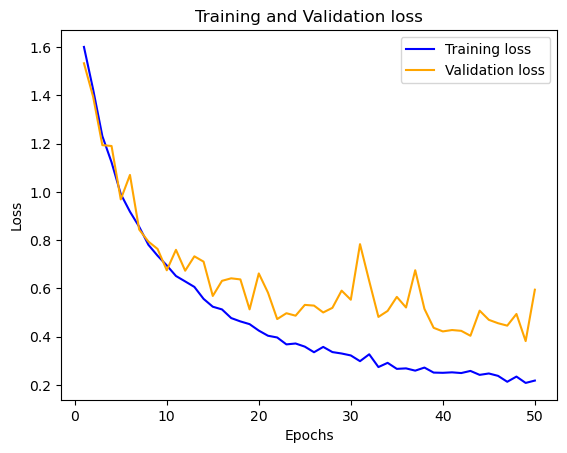

In [22]:
import matplotlib.pyplot as plt

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs, val_loss, 'orange',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

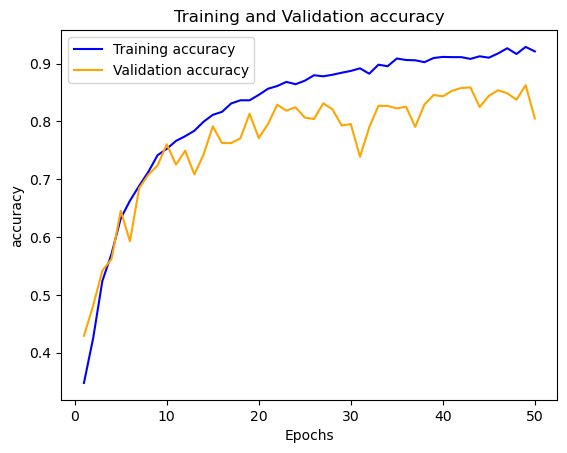

In [23]:
import matplotlib.pyplot as plt

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']


plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs, val_acc, 'orange',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [24]:
model_1.evaluate(test_images,test_oh_labels)

32/32 [==============================] - 5s 136ms/step - loss: 0.9919 - accuracy: 0.7396


[0.991863489151001, 0.7395626306533813]

In [25]:
r = []
lis = os.listdir('./img/Random_image/')
for i in lis:
    print(i)
    img = Image.open(f'./img/Random_image/{i}')
    img = img.convert('RGB')
    img = img.resize((128,128))
    img = np.array(img)
    r.append(img)
r=np.array(r)
pred = model_1.predict(r)
for p in pred:
    if np.argmax(p) == 0:
        print('바질')
    elif np.argmax(p) == 1:
        print('몬스테라')
    elif np.argmax(p) == 2:
        print('산세베리아')
    elif np.argmax(p) == 3:
        print('스킨답서스')
    elif np.argmax(p) == 4:
        print('스투키')

20230807_035242.jpg
20230807_035244.jpg
stuckyi.jpeg
몬스테라.jpeg
몬스테라_2.jpeg
바질.jpg
바질_2.jpg
산세베리아.jpeg
산세비에리아_2.jpeg
스킨답서스.jpg
스킨답서스_2.jpg
스투키.jpeg
1/1 [==============================] - 1s 553ms/step
스투키
스투키
몬스테라
스투키
바질
바질
스투키
몬스테라
바질
스투키


In [26]:
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models

model_1 = Sequential()
model_1.add(layers.Conv2D(input_shape=(128,128,3),kernel_size=(3,3),filters=32,padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model_1.add(layers.MaxPooling2D(pool_size=(2,2)))
model_1.add(Dropout(0.25))

model_1.add(Flatten())
model_1.add(Dense(256,activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(128,activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(7,activation='softmax'))

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import  Accuracy
import tensorflow as tf

model_1.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [27]:
history_1 = model_1.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=30,validation_split=0.2)

Epoch 1/30
259/259 [==============================] - 198s 732ms/step - loss: 1.6447 - accuracy: 0.3262 - val_loss: 1.5633 - val_accuracy: 0.3803
Epoch 2/30
259/259 [==============================] - 183s 708ms/step - loss: 1.4939 - accuracy: 0.4026 - val_loss: 1.4337 - val_accuracy: 0.4156
Epoch 3/30
259/259 [==============================] - 180s 694ms/step - loss: 1.3555 - accuracy: 0.4675 - val_loss: 1.2826 - val_accuracy: 0.5080
Epoch 4/30
259/259 [==============================] - 185s 716ms/step - loss: 1.2193 - accuracy: 0.5303 - val_loss: 1.3022 - val_accuracy: 0.5075
Epoch 5/30
259/259 [==============================] - 184s 712ms/step - loss: 1.1418 - accuracy: 0.5714 - val_loss: 1.0909 - val_accuracy: 0.5820
Epoch 6/30
259/259 [==============================] - 184s 711ms/step - loss: 1.0751 - accuracy: 0.6048 - val_loss: 1.0664 - val_accuracy: 0.6014
Epoch 7/30
259/259 [==============================] - 184s 710ms/step - loss: 1.0157 - accuracy: 0.6332 - val_loss: 0.9706 -

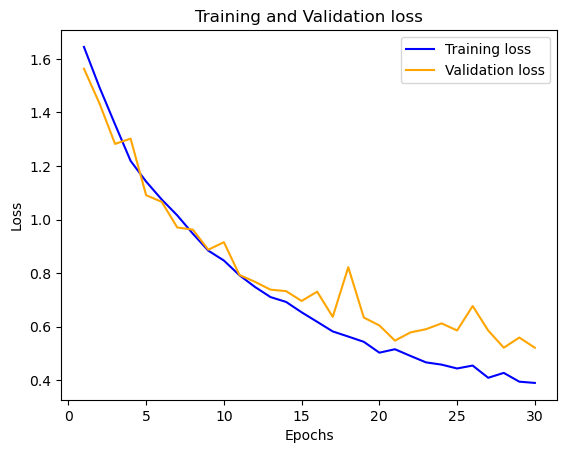

In [28]:
import matplotlib.pyplot as plt

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs, val_loss, 'orange',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

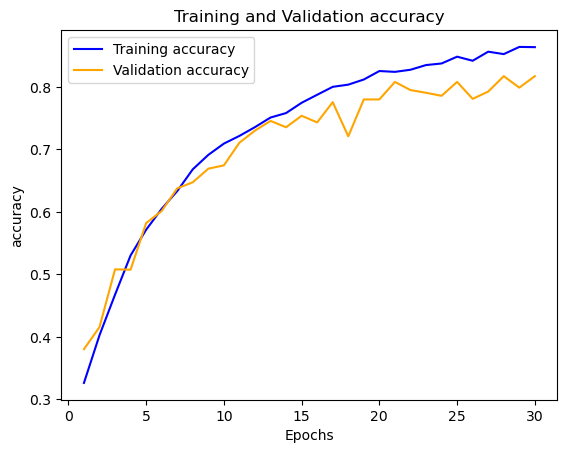

In [29]:
import matplotlib.pyplot as plt

acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']


plt.plot(epochs,acc,'b',label='Training accuracy')
plt.plot(epochs, val_acc, 'orange',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [30]:
preds = model_1.predict(test_images, batch_size=32)
for pred_1 in preds:
    print(pred_1)

32/32 [==============================] - 6s 156ms/step
[1.2666731e-11 1.7578250e-13 2.7802925e-13 1.0925048e-04 5.2376627e-04
 1.0834344e-06 9.9936587e-01]
[2.5712603e-03 2.5880780e-05 7.8666611e-03 3.0862827e-02 7.0285499e-03
 9.5089614e-01 7.4871915e-04]
[2.3329058e-05 9.8001468e-01 1.9941825e-02 1.4304858e-05 3.3016858e-07
 4.3076002e-06 1.3684951e-06]
[0.00651923 0.00410527 0.01337644 0.86005867 0.00691148 0.08705143
 0.0219775 ]
[1.8645308e-04 5.2278268e-05 1.8050818e-05 2.3163961e-01 4.0517706e-02
 8.1882756e-03 7.1939760e-01]
[6.9391672e-07 5.1807564e-07 9.6654183e-08 6.5986121e-01 1.0496703e-02
 1.6928052e-04 3.2947153e-01]
[6.93152549e-11 3.34666669e-11 9.42712922e-12 1.09424924e-04
 7.67518673e-03 5.27887266e-07 9.92214859e-01]
[1.7633465e-05 9.7382632e-08 1.7595484e-07 4.5775455e-06 9.9145657e-01
 1.5554039e-04 8.3654393e-03]
[0.01791497 0.20677005 0.5299254  0.15923083 0.00241891 0.08070456
 0.00303532]
[0.00749653 0.00118052 0.04714465 0.11257046 0.01764286 0.81215984
 0.0

In [31]:
model_1.evaluate(test_images,test_oh_labels)

32/32 [==============================] - 5s 146ms/step - loss: 0.9640 - accuracy: 0.7157


[0.9639979600906372, 0.7157057523727417]

In [32]:
r = []
lis = os.listdir('./img/Random_image/')
for i in lis:
    print(i)
    img = Image.open(f'./img/Random_image/{i}')
    img = img.convert('RGB')
    img = img.resize((128,128))
    img = np.array(img)
    r.append(img)
r=np.array(r)
pred = model_1.predict(r)
for p in pred:
    if np.argmax(p) == 0:
        print('바질')
    elif np.argmax(p) == 1:
        print('몬스테라')
    elif np.argmax(p) == 2:
        print('산세베리아')
    elif np.argmax(p) == 3:
        print('스킨답서스')
    elif np.argmax(p) == 4:
        print('스투키')

20230807_035242.jpg
20230807_035244.jpg
stuckyi.jpeg
몬스테라.jpeg
몬스테라_2.jpeg
바질.jpg
바질_2.jpg
산세베리아.jpeg
산세비에리아_2.jpeg
스킨답서스.jpg
스킨답서스_2.jpg
스투키.jpeg
1/1 [==============================] - 1s 594ms/step
스투키
스투키
몬스테라
스투키
바질
바질
스투키
몬스테라
바질
스투키


In [16]:
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,models

model_2 = Sequential()
model_2.add(layers.Conv2D(32,(3,3),padding='same',input_shape=train_images.shape[1:],activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(layers.Conv2D(128,(3,3),padding='same',activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(layers.Conv2D(64,(3,3),padding='same',activation='relu'))
model_2.add(layers.MaxPooling2D(pool_size=(2,2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(256,activation='relu'))
model_2.add(Dropout(0.25))
model_2.add(Dense(7,activation='softmax'))

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import  Accuracy
import tensorflow as tf

model_2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [17]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 64)       

In [34]:
history_2 = model_2.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=30,validation_split=0.2)

Epoch 1/30
259/259 [==============================] - 197s 731ms/step - loss: 1.5806 - accuracy: 0.3595 - val_loss: 1.4778 - val_accuracy: 0.3977
Epoch 2/30
259/259 [==============================] - 186s 720ms/step - loss: 1.3424 - accuracy: 0.4670 - val_loss: 1.3692 - val_accuracy: 0.4325
Epoch 3/30
259/259 [==============================] - 187s 721ms/step - loss: 1.1933 - accuracy: 0.5339 - val_loss: 1.1240 - val_accuracy: 0.5646
Epoch 4/30
259/259 [==============================] - 184s 712ms/step - loss: 1.0925 - accuracy: 0.5896 - val_loss: 1.0857 - val_accuracy: 0.5810
Epoch 5/30
259/259 [==============================] - 185s 716ms/step - loss: 0.9907 - accuracy: 0.6294 - val_loss: 0.9399 - val_accuracy: 0.6333
Epoch 6/30
259/259 [==============================] - 189s 729ms/step - loss: 0.9267 - accuracy: 0.6567 - val_loss: 1.0127 - val_accuracy: 0.6101
Epoch 7/30
259/259 [==============================] - 188s 727ms/step - loss: 0.8818 - accuracy: 0.6814 - val_loss: 0.9169 -

In [35]:
model_2.evaluate(test_images,test_oh_labels)

32/32 [==============================] - 5s 164ms/step - loss: 0.8392 - accuracy: 0.7465


[0.8391722440719604, 0.7465208768844604]

In [36]:
r = []
lis = os.listdir('./img/Random_image/')
for i in lis:
    print(i)
    img = Image.open(f'./img/Random_image/{i}')
    img = img.convert('RGB')
    img = img.resize((128,128))
    img = np.array(img)
    r.append(img)
r=np.array(r)
pred = model_2.predict(r)
for p in pred:
    if np.argmax(p) == 0:
        print('바질')
    elif np.argmax(p) == 1:
        print('몬스테라')
    elif np.argmax(p) == 2:
        print('산세베리아')
    elif np.argmax(p) == 3:
        print('스킨답서스')
    elif np.argmax(p) == 4:
        print('스투키')

20230807_035242.jpg
20230807_035244.jpg
stuckyi.jpeg
몬스테라.jpeg
몬스테라_2.jpeg
바질.jpg
바질_2.jpg
산세베리아.jpeg
산세비에리아_2.jpeg
스킨답서스.jpg
스킨답서스_2.jpg
스투키.jpeg
1/1 [==============================] - 1s 734ms/step
스투키
스투키
스투키
바질
스투키
스투키
스투키
바질
스투키


In [37]:
model_2.save('classify.h5')

In [38]:
import tensorflow as tf

from tensorflow import keras
def convert_model(model_path, tflite_path):
    model = keras.models.load_model('./classify.h5')
    converter = tf.lite.TFLiteConverter.from_keras_model(model)
    flat_data = converter.convert()

    with open(tflite_path, 'wb') as f:
        f.write(flat_data)

convert_model('./classify.h5','./classify.tflite')

INFO:tensorflow:Assets written to: C:\Users\LEEBYC\AppData\Local\Temp\tmps_22noey\assets


INFO:tensorflow:Assets written to: C:\Users\LEEBYC\AppData\Local\Temp\tmps_22noey\assets
